### Summary

<p>
This project explores correlation in the Boston housing data set.
</p>

<p>
There are 14 attributes in each case of the dataset. The variables are:
</p>

<ul>
<li>
CRIM - per capita crime rate by town
</li>
<li>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
</li>
<li>
INDUS - proportion of non-retail business acres per town.
</li>
<li>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
</li>
<li>
NOX - nitric oxides concentration (parts per 10 million)
</li>
<li>
RM - average number of rooms per dwelling
</li>
<li>
AGE - proportion of owner-occupied units built prior to 1940
</li>
<li>
DIS - weighted distances to five Boston employment centres
</li>
<li>
RAD - index of accessibility to radial highways
</li>
<li>
TAX - full-value property-tax rate per 10000 Dollar
</li>

<li>
PTRATIO - pupil-teacher ratio by town
</li>
<li>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
</li>
<li>
LSTAT - % lower status of the population
</li>
<li>
MEDV - Median value of owner-occupied homes in 1000 Dollars
</li>
<li>
TAX - full-value property-tax rate per 1000 Dollars
</li>
<li>
PTRATIO - pupil-teacher ratio by town
</li>
<li>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
</li>
<li>
LSTAT - % lower status of the population
</li>
<li>
MEDV - Median value of owner-occupied homes in 1000 Dollars
</li>
</ul>



Install packages

In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

Read in data sets

In [5]:
print(os.getcwd())
boston_housing_data = \
pd.read_csv("boston.csv", delimiter=",", header=0)

C:\Users\gamarandor\data_science\data_science_projects\data_camp_projects\boston


Explorative data analysis - Look at the data

In [6]:
boston_housing_data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
boston_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


All numerical variables.

In [8]:
boston_housing_data.shape

(506, 14)

In [9]:
boston_housing_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

506 observations and 14 variables.

In [10]:
boston_housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


506 Observations. Mean from ca. 3 to ca. 69. Max from 1 to 369. For RM and CHAS mean and median are similiar.
This points out to a symetric distribution.

In [11]:
boston_housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

The data set is clean and none null values.

#### Univariate data analysis - MEDV
<p>
MEDV - Median value of owner-occupied homes in 1000 Dollars
</p>
<p>
The value of a house is of hight interest for buyers, sellers and investors. The medv variable is the target variable. This variable deserves therefore
further investigation.
</p>

In [12]:
boston_medv = boston_housing_data["MEDV"]
print(type(boston_medv))
print(type(boston_medv[1]))

<class 'pandas.core.series.Series'>
<class 'numpy.float64'>


The MEDV is of type float stored in a panda series.

Create two quantile functions: 25% and 75% quantiles using in aggregate

In [13]:
def mode_value(s):
    """Calculate the most frequent value"""
    df = s.to_frame()
    mode = df.mode().iloc[0,0]    
    return mode

def mode_count(s):
    """Count of the mode value"""
    g = s.value_counts()
    count = g.iloc[0]
    return count

def quantile_25(s):
    s.dropna(inplace=True)
    pd.Series(s)
    b = round(s.quantile(q=0.25),2)
    return b

def quantile_75(s):
    s.dropna(inplace=True)
    pd.Series(s)
    c = round(s.quantile(q=0.75),2)
    return c

def iqr(s):
    c = round(s.quantile(q=0.75),2)
    b = round(s.quantile(q=0.25),2)
    d = c - b
    return d
    
def data_range(s):
    min_a = round(s.min(), 2)
    max_b = round(s.max(), 2)
    d = max_b - min_a
    return d

Computing statistics of MEDV

In [14]:
def univariate_statistics(s):
    statistics = s.agg(["count", mode_value,  mode_count, "sum", "max", "min", "mean","std", quantile_25,
                        "median", quantile_75, iqr, data_range, "skew", "kurtosis"]).round(3)
    return statistics
    
univariate_statistics(boston_medv)

count            506.000
mode_value        50.000
mode_count        16.000
sum            11401.600
max               50.000
min                5.000
mean              22.533
std                9.197
quantile_25       17.020
median            21.200
quantile_75       25.000
iqr                7.980
data_range        45.000
skew               1.108
kurtosis           1.495
Name: MEDV, dtype: float64

The total value of the boston housing market  consiting of 506 houses is 11401 \* 1000 dollars. 
The max value is 50 \* 1000 dollars and the min value is 5 \* 1000 dollars. The mean is 22 \* 1000 and the median 21 \* 1000. Both are similar, but not equal. This points to a symetric distribution, while the distribution is slightly right skewed or is positive or has long tail to the right. This is a hint of outliers to the right.

#### <b>Investigate frequencies</b>

There are 229 unique values. 50 is the most frequent with 16 counts, followed by 25 with 8 counts.
This gives a somewhat crooked impression about the distribution, because 50 is the mode of 229 unique values with
a decimal place of 1. Rounding up to 0 decimal places changes the mode 20.

In [15]:
print(len(boston_medv.unique()))
print(pd.Series(boston_medv.unique()).head(11))
print(boston_medv.value_counts().sort_values(ascending=False).head(10))
print(boston_medv.round(0).value_counts().sort_values(ascending=False).head(10))

229
0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
5     28.7
6     22.9
7     27.1
8     16.5
9     18.9
10    15.0
dtype: float64
50.0    16
25.0     8
21.7     7
22.0     7
23.1     7
20.6     6
19.4     6
20.1     5
15.6     5
21.4     5
Name: MEDV, dtype: int64
20.0    41
23.0    36
22.0    36
24.0    32
19.0    30
21.0    28
18.0    25
14.0    23
25.0    20
13.0    18
Name: MEDV, dtype: int64


Making a frequency interval table (data frame) over 10 classes of the MEDV variable and cumulate sums

In [16]:
def frequency_interval_table(s,classes):
    qc_fare = pd.qcut(round(s,1), q=classes, precision=0)
    qc_fare_interval_counts = qc_fare.value_counts().sort_index()
    df_fare_interval = pd.DataFrame(qc_fare_interval_counts)
    df_fare_interval["cumsum"] =  qc_fare_interval_counts.cumsum()
    df_fare_interval.rename(columns={"MEDV":"counts"}, inplace=True)
    df_fare_interval.index.name = "classes along variable"
    return df_fare_interval

print(frequency_interval_table(boston_medv, 10))

                        counts  cumsum
classes along variable                
(4.0, 13.0]                 51      51
(13.0, 15.0]                51     102
(15.0, 18.0]                51     153
(18.0, 20.0]                50     203
(20.0, 21.0]                53     256
(21.0, 23.0]                48     304
(23.0, 24.0]                50     354
(24.0, 28.0]                51     405
(28.0, 35.0]                50     455
(35.0, 50.0]                51     506


In the class containg the mean are 48 objects. Mean and median are in the same class.
In the class 35 to 50 are only five houses. 

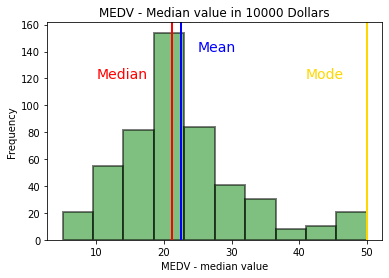

In [26]:
plt.hist(boston_housing_data["MEDV"], color="green", alpha=0.5, bins=10 ,
         histtype='bar', ec='black', linewidth=2)
plt.xlabel("MEDV - median value")
plt.ylabel("Frequency")
plt.title("MEDV - Median value in 10000 Dollars")

plt.axvline(x=22.533, linewidth=2, color="b")
plt.text(s="Mean", x=25, y=140, color="b", size=14)

plt.axvline(x=21.200, linewidth=2, color="r")
plt.text(s="Median", x=10, y=120, color="r", size=14)

plt.axvline(x=50, linewidth=2, color="gold")
plt.text(s="Mode", x=41, y=120, color="gold", size=14)

plt.text
plt.show()

<p>
The mean is larger than the median. The distribution had positive skew to the right. While this is the case
the distribution between 5 and 35 is symmetric. The skewness is 1.108. This indicates also highly skewed distribution.
</p>
<p>
The kurtosis is with 1.495 greater than 0 and is leptokurtic with heavy tails, which is confirmed by the plot,
while the heavy tail occurs solely to the right.
<p>
This points out to the occurence of outliers in the right tail.
</p>
<p>
Please keep in mind that kurtosis and skewness are prone to distortions by sample size and
can only supporting conclusions given by the histogram.
</p>

Empirical cumulative distribution function (ECDF) - Version 1

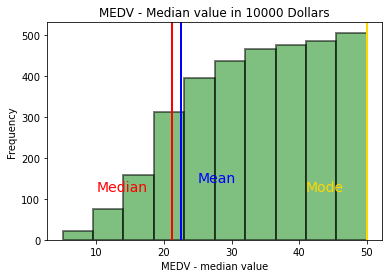

In [28]:
plt.hist(boston_housing_data["MEDV"], color="green", cumulative=True, alpha=0.5, histtype='bar', ec='black',
         linewidth=2)
plt.xlabel("MEDV - median value")
plt.ylabel("Frequency")
plt.title("MEDV - Median value in 10000 Dollars")

plt.axvline(x=22.533, linewidth=2, color="b")
plt.text(s="Mean", x=25, y=140, color="b", size=14)

plt.axvline(x=21.200, linewidth=2, color="r")
plt.text(s="Median", x=10,y=120, color="r", size=14)

plt.axvline(x=50, linewidth=2, color="gold")
plt.text(s="Mode", x=41, y=120, color="gold", size=14)

plt.show()

Empirical cumulative distribution function (ECDF) - Version 2

In [19]:
def ecdf(s, name):
    """Compute ECDF for a one-dimensional array of measurements."""
    # s is a data series
    # name is a string
    # Create a series of ordered x-values
    x = np.sort(s)
    # Number of data points: n
    n = len(s)
    # y-data for the ECDF: y
    y = np.arange(start=1, stop=n+1)/n
    # Plot the ECDF
    plt.plot(x, y, marker='.', linestyle='none', color="red")
    plt.xlabel(name)
    plt.ylabel("Cumulative probabilities")
    plt.title("Empirical cumulative distribution function (ECDF)")
    plt.show()

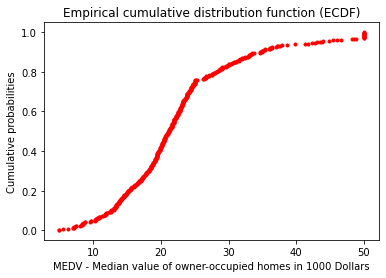

In [20]:
ecdf(boston_medv, "MEDV - Median value of owner-occupied homes in 1000 Dollars")

0.2 of the houses are equal or less worth of a MEDV of ca. 15.
0.4 of the houses are equal or less worth of a MEDV of ca. 20.
0.6 of the houses are equal or less worth of a MEDV of ca. 23.
0.8 of the houses are equal or less worth of a MEDV of ca. 25.
0.9 of the houses are equal or less worth of a MEDV of ca. 40.


#### Bivariate analysis - quick

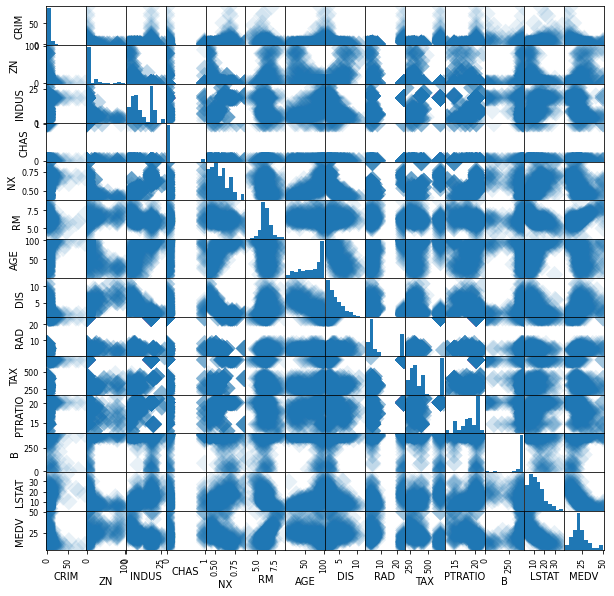

In [21]:
_ = pd.plotting.scatter_matrix(boston_housing_data, figsize = [10, 10], s=150, marker = 'D', alpha=0.1) 
plt.show()

In [22]:
boston_corr_matrix = boston_housing_data.corr()
boston_corr_matrix

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


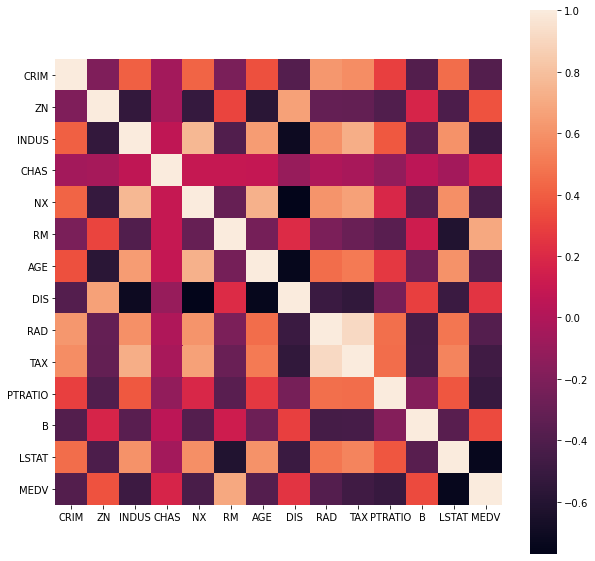

In [23]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(111)
sns.heatmap(boston_corr_matrix, square=True)
plt.show()

<p>
There is a strong positive correlation of 0.910228 between RAD and TAX. <br>
There is a strong positive correlation of below 0.763651 between NX and INDUS. <br>
There is strong negative correlation between MEDV and LSTAT, which makes intuitively sense.<br>
There is strong negative correlation of -0.747881 between Age and DIS.
</p>
<p>
MEDV has mostly moderate correlations between -0.4 and 0.4. Exceptions are LSTAT (-0.737663) and RM (0.695360)
</p>
